In [2]:
# -*- coding: utf-8 -*-
import sys
import pickle
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

/Users/ly11/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

## 一、数据集概况

In [5]:
### 数据集背景
i = 0
for key, values in data_dict.items():
    if i < 2:
        print key
        print values
        i += 1

METTS MARK
{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}
BAXTER JOHN C
{'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees'

In [6]:
my_data = data_dict
my_df = pd.DataFrame.from_dict(my_data, orient = "index")
my_df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [7]:
# 数据点总数及特征数量(包括'poi'在内)
print len(my_df)
print len(my_df.columns)

146
21


In [8]:
# POI数和非POI数
print len(my_df[my_df['poi'] == True])
print len(my_df[my_df['poi'] == False])

18
128


In [9]:
# 哪些特征含有缺失值？
print my_df.info()
my_df = my_df.replace('NaN',np.nan)
print my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
director_fees                146 non-null object
deferred_income              146 non-null object


• 数据集共有146个数据点，共21列，使用的特征数量共19个，poi为我们需要预测的二分变量，email_address为文本数据，后续建模将不考虑该特征

• 其中包含poi（嫌疑人）18个，非嫌疑人128个

• 可以看出除了poi是146个值，其他变量均有缺失

In [10]:
# 将特征按财务数据（payment、stock）、邮箱数据排序
pm_list = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', \
           'deferral_payments','loan_advances', 'other', 'expenses', 'director_fees', 'total_payments']
st_list = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']
em_list = ['to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'shared_receipt_with_poi']

my_df = my_df.loc[:, ['poi']+pm_list+st_list+em_list]
print my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 20 columns):
poi                          146 non-null bool
salary                       95 non-null float64
bonus                        82 non-null float64
long_term_incentive          66 non-null float64
deferred_income              49 non-null float64
deferral_payments            39 non-null float64
loan_advances                4 non-null float64
other                        93 non-null float64
expenses                     95 non-null float64
director_fees                17 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
to_messages                  86 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float

## 二、探索数据问题

In [11]:
### 财务数据问题
# 财务数据框,缺失值填补为0
fn_df = my_df[pm_list+st_list].fillna(0)
fn_df.info()

em_df = my_df[em_list]

my_df = pd.concat([my_df['poi'],fn_df, em_df], axis = 1)
my_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 14 columns):
salary                       146 non-null float64
bonus                        146 non-null float64
long_term_incentive          146 non-null float64
deferred_income              146 non-null float64
deferral_payments            146 non-null float64
loan_advances                146 non-null float64
other                        146 non-null float64
expenses                     146 non-null float64
director_fees                146 non-null float64
total_payments               146 non-null float64
exercised_stock_options      146 non-null float64
restricted_stock             146 non-null float64
restricted_stock_deferred    146 non-null float64
total_stock_value            146 non-null float64
dtypes: float64(14)
memory usage: 17.1+ KB


,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
ALLEN PHILLIP K,False,201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,1729541.0,126027.0,-126027.0,1729541.0,2902.0,2195.0,47.0,65.0,1407.0
BADUM JAMES P,False,0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,257817.0,0.0,0.0,257817.0,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,False,477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0,4046157.0,1757552.0,-560222.0,5243487.0,566.0,29.0,39.0,0.0,465.0
BAXTER JOHN C,False,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,6680544.0,3942714.0,0.0,10623258.0,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,False,239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0,0.0,145796.0,-82782.0,63014.0,NaN,NaN,NaN,NaN,NaN


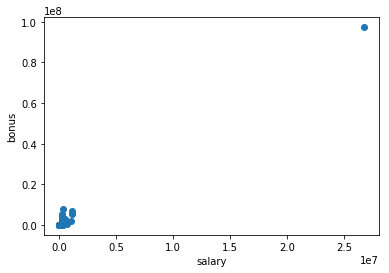

In [12]:
# 找出财务数据图中异常值点
plt.scatter(my_df['salary'],my_df['bonus'])
plt.xlabel('salary')
plt.ylabel('bonus')
plt.show()

In [13]:
my_df[my_df['salary'] > 2.5 * 10**7]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi
TOTAL,False,26704229.0,97343619.0,48521928.0,-27992891.0,32083396.0,83925000.0,42667589.0,5235198.0,1398517.0,309886585.0,311764000.0,130322299.0,-7576788.0,434509511.0,NaN,NaN,NaN,NaN,NaN


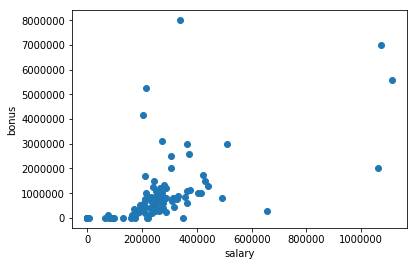

In [14]:
# 删除除财务数据中明显的异常值点
my_df = my_df.drop('TOTAL')
plt.scatter(my_df['salary'],my_df['bonus'])
plt.xlabel('salary')
plt.ylabel('bonus')
plt.show()

In [15]:
# 原始财务数据中的非人名：“THE TRAVEL AGENCY IN THE PARK”，需要删除
print my_df.loc['THE TRAVEL AGENCY IN THE PARK',:]
my_df = my_df.drop('THE TRAVEL AGENCY IN THE PARK')

poi                           False
salary                            0
bonus                             0
long_term_incentive               0
deferred_income                   0
deferral_payments                 0
loan_advances                     0
other                        362096
expenses                          0
director_fees                     0
total_payments               362096
exercised_stock_options           0
restricted_stock                  0
restricted_stock_deferred         0
total_stock_value                 0
to_messages                     NaN
from_messages                   NaN
from_poi_to_this_person         NaN
from_this_person_to_poi         NaN
shared_receipt_with_poi         NaN
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object


In [16]:
# 原始财务数据中值全为NaN的行'LOCKHART EUGENE E',需要删除
print my_df.loc['LOCKHART EUGENE E',:]
my_df = my_df.drop('LOCKHART EUGENE E')

poi                          False
salary                           0
bonus                            0
long_term_incentive              0
deferred_income                  0
deferral_payments                0
loan_advances                    0
other                            0
expenses                         0
director_fees                    0
total_payments                   0
exercised_stock_options          0
restricted_stock                 0
restricted_stock_deferred        0
total_stock_value                0
to_messages                    NaN
from_messages                  NaN
from_poi_to_this_person        NaN
from_this_person_to_poi        NaN
shared_receipt_with_poi        NaN
Name: LOCKHART EUGENE E, dtype: object


In [17]:
# 财务数据表格中，payments和stock总数是否正确？
def total(my_df, my_list):
    total = 0
    for i in range(len(my_list)-1):
        total = total + my_df[my_list[i]]
    return total

In [18]:
my_df[pm_list][my_df['total_payments'] != total(my_df, pm_list)]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
BELFER ROBERT,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0
BHATNAGAR SANJAY,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0


In [19]:
my_df[st_list][my_df['total_stock_value'] != total(my_df, st_list)]

,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
BELFER ROBERT,3285.0,0.0,44093.0,-44093.0
BHATNAGAR SANJAY,2604490.0,-2604490.0,15456290.0,0.0


In [20]:
# 对比原始财务数据，发现字典中有两个人的值人工输入错误。下面将其调整正确：
v1 = my_df[pm_list+st_list].loc['BELFER ROBERT',:].values
n_v1 = list(v1)[1:] + [0.0]
my_df.loc['BELFER ROBERT','salary':'total_stock_value'] = n_v1

v2 = my_df[pm_list+st_list].loc['BHATNAGAR SANJAY',:].values
n_v2 = [0.0] + list(v2)[:-1]
my_df.loc['BHATNAGAR SANJAY','salary':'total_stock_value'] = n_v2

In [21]:
# 检查是否已经修正完毕
my_df[my_df['total_payments'] != total(my_df, pm_list)]

,poi,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi


In [22]:
### 邮件数据问题
# 填充邮件数据缺失值，需要将poi和非poi分开，以便后续分别考察
em_poi = my_df[my_df['poi'] == True][em_list]
em_notpoi = my_df[my_df['poi'] == False][em_list]

/Users/ly11/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/ly11/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


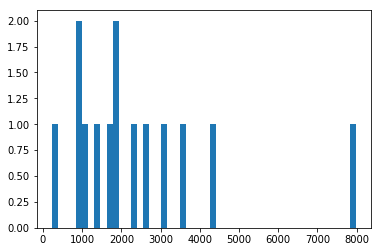

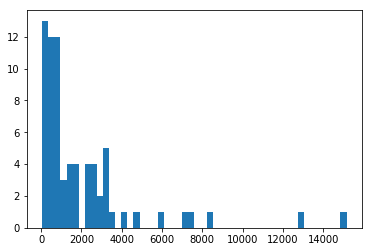

In [23]:
# 收到的消息，分布
plt.hist(em_poi['to_messages'], 50, range = (em_poi['to_messages'].min(), em_poi['to_messages'].max()))
plt.show()
plt.hist(em_notpoi['to_messages'], 50, range = (em_notpoi['to_messages'].min(), em_notpoi['to_messages'].max()))
plt.show()

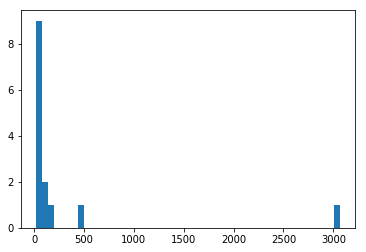

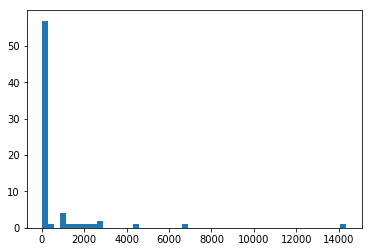

In [24]:
# 发出的消息，分布
plt.hist(em_poi['from_messages'], 50, range = (em_poi['from_messages'].min(), em_poi['from_messages'].max()))
plt.show()
plt.hist(em_notpoi['from_messages'], 50, range = (em_notpoi['from_messages'].min(), em_notpoi['from_messages'].max()))
plt.show()

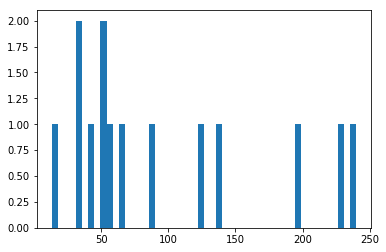

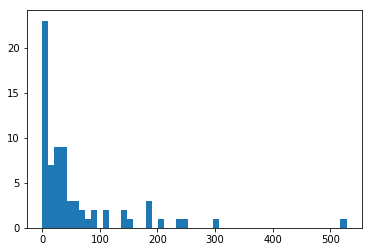

In [25]:
# 收到poi的消息
plt.hist(em_poi['from_poi_to_this_person'], 50, range = (em_poi['from_poi_to_this_person'].min(), em_poi['from_poi_to_this_person'].max()))
plt.show()
plt.hist(em_notpoi['from_poi_to_this_person'], 50, range = (em_notpoi['from_poi_to_this_person'].min(), em_notpoi['from_poi_to_this_person'].max()))
plt.show()

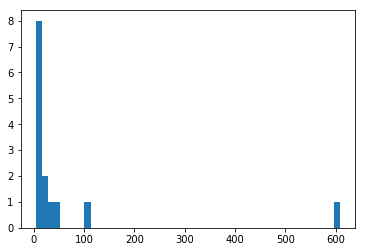

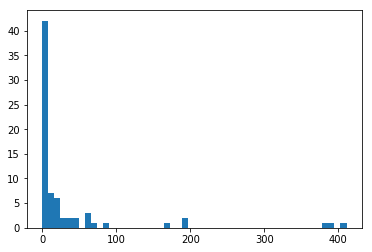

In [26]:
#发给poi的消息
plt.hist(em_poi['from_this_person_to_poi'], 50, range = (em_poi['from_this_person_to_poi'].min(), em_poi['from_this_person_to_poi'].max()))
plt.show()
plt.hist(em_notpoi['from_this_person_to_poi'], 50, range = (em_notpoi['from_this_person_to_poi'].min(), em_notpoi['from_this_person_to_poi'].max()))
plt.show()

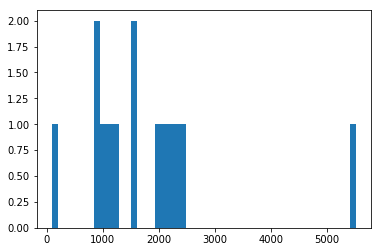

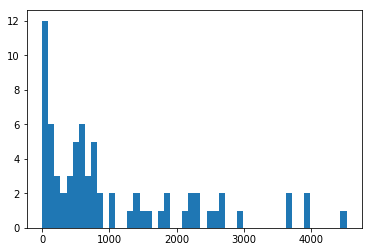

In [27]:
#与poi共享的收据数
plt.hist(em_poi['shared_receipt_with_poi'], 50, range = (em_poi['shared_receipt_with_poi'].min(), em_poi['shared_receipt_with_poi'].max()))
plt.show()
plt.hist(em_notpoi['shared_receipt_with_poi'], 50, range = (em_notpoi['shared_receipt_with_poi'].min(), em_notpoi['shared_receipt_with_poi'].max()))
plt.show()

In [28]:
# 上面三组图可以看出，poi和非poi，邮件数据分布有较大差异，由于分布都不均匀，所以用各自的中位数进行填充
em_poi = em_poi.fillna(em_poi[em_list].median())
print em_poi.info()
em_notpoi = em_notpoi.fillna(em_notpoi[em_list].median())
print em_notpoi.info()
em_df = em_poi.append(em_notpoi)
print em_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, BELDEN TIMOTHY N to YEAGER F SCOTT
Data columns (total 5 columns):
to_messages                18 non-null float64
from_messages              18 non-null float64
from_poi_to_this_person    18 non-null float64
from_this_person_to_poi    18 non-null float64
shared_receipt_with_poi    18 non-null float64
dtypes: float64(5)
memory usage: 864.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 5 columns):
to_messages                125 non-null float64
from_messages              125 non-null float64
from_poi_to_this_person    125 non-null float64
from_this_person_to_poi    125 non-null float64
shared_receipt_with_poi    125 non-null float64
dtypes: float64(5)
memory usage: 5.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, BELDEN TIMOTHY N to YEAP SOON
Data columns (total 5 columns):
to_messages                143 non-null float64
from_messages    

In [29]:
em_df = em_poi.append(em_notpoi)
print em_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, BELDEN TIMOTHY N to YEAP SOON
Data columns (total 5 columns):
to_messages                143 non-null float64
from_messages              143 non-null float64
from_poi_to_this_person    143 non-null float64
from_this_person_to_poi    143 non-null float64
shared_receipt_with_poi    143 non-null float64
dtypes: float64(5)
memory usage: 6.7+ KB
None


In [30]:
my_df = pd.concat([my_df['poi'],fn_df,em_df], axis = 1)

以上清除了明显的问题数据，下面对不具有代表性的数据进行探索。
我们对于非poi人员的异常数据较为敏感，希望能够首先排除非poi里的异常值，以降低算法的误判。
假设非poi中所有数值低于5%和高于95%的，为异常值。

In [31]:
### Task 2: Remove outliers 寻找非poi里的异常值，避免非poi里的异常数据影响机器学习算法的决策
my_df['poi'].value_counts()

False    125
True      18
Name: poi, dtype: int64

In [32]:
notpoi_df = my_df[my_df['poi'] == False]
qt1 = notpoi_df.quantile(q=0.05, axis=0)
print qt1

qt2 = notpoi_df.quantile(q=0.95, axis=0)
print qt2

salary                            0.0
bonus                             0.0
long_term_incentive               0.0
deferred_income             -714172.4
deferral_payments                 0.0
loan_advances                     0.0
other                             0.0
expenses                          0.0
director_fees                     0.0
total_payments                    0.0
exercised_stock_options           0.0
restricted_stock                  0.0
restricted_stock_deferred   -276578.0
total_stock_value                 0.0
to_messages                     170.4
from_messages                    14.0
from_poi_to_this_person           0.0
from_this_person_to_poi           0.0
shared_receipt_with_poi          26.6
Name: 0.05, dtype: float64
salary                        373389.6
bonus                        2000000.0
long_term_incentive          1330962.8
deferred_income                    0.0
deferral_payments            1262597.6
loan_advances                      0.0
other            

In [33]:
outliers = notpoi_df[(notpoi_df < qt1) | (notpoi_df > qt2)].count(axis=1)
outliers.sort_values(axis=0, ascending=False).head(10)

FREVERT MARK A         12
LAVORATO JOHN J         8
BAXTER JOHN C           8
WHALLEY LAWRENCE G      7
KEAN STEVEN J           6
ALLEN PHILLIP K         5
DERRICK JR. JAMES V     5
KITCHEN LOUISE          5
PAI LOU L               4
BHATNAGAR SANJAY        4
dtype: int64

In [34]:
# 删除前四个异常值较多的非poi，以降低他们其他非poi数据的影响
my_df.drop(['FREVERT MARK A', 'LAVORATO JOHN J', 'WHALLEY LAWRENCE G', 'BAXTER JOHN C'], axis=0, inplace=True)

至此，缺失值填补完毕，异常问题清理完毕。

In [35]:
# 清洗后的df信息
my_df.info()
my_df['poi'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 20 columns):
poi                          139 non-null object
salary                       142 non-null float64
bonus                        142 non-null float64
long_term_incentive          142 non-null float64
deferred_income              142 non-null float64
deferral_payments            142 non-null float64
loan_advances                142 non-null float64
other                        142 non-null float64
expenses                     142 non-null float64
director_fees                142 non-null float64
total_payments               142 non-null float64
exercised_stock_options      142 non-null float64
restricted_stock             142 non-null float64
restricted_stock_deferred    142 non-null float64
total_stock_value            142 non-null float64
to_messages                  139 non-null float64
from_messages                139 non-null float64
from_poi_to_this_person      13

False    121
True      18
Name: poi, dtype: int64

## 三、特征选择与优化

In [36]:
### Task 3: Create new feature(s). The first feature must be "poi".

In [37]:
# 运用直觉，手动创建新特征
'''
plt.scatter(my_df['bonus']/my_df['total_payments'],
            my_df['salary']/my_df['total_payments'], alpha=0.6, c=my_df['poi'])
plt.show()


plt.scatter(my_df['restricted_stock']/my_df['total_stock_value'],
            my_df['exercised_stock_options']/my_df['total_stock_value'], 
            c=my_df['poi'],alpha=0.6)
plt.show()


plt.scatter(my_df['from_this_person_to_poi']/my_df['from_messages'],\
            my_df['from_poi_to_this_person']/my_df['to_messages'], \
            c=my_df['poi'],alpha=0.6)
plt.show()


plt.scatter(my_df['from_poi_to_this_person']/my_df['shared_receipt_with_poi'],\
            my_df['shared_receipt_with_poi']/my_df['to_messages'], \
            c=my_df['poi'],alpha=0.6)
plt.show()


plt.scatter(my_df['from_this_person_to_poi']/my_df['from_messages'],\
            my_df['shared_receipt_with_poi']/my_df['to_messages'], \
            c=my_df['poi'],alpha=0.6)
plt.show()


plt.scatter(my_df['from_poi_to_this_person']/my_df['to_messages'], \
            my_df['shared_receipt_with_poi']/my_df['to_messages'],\
            c=my_df['poi'],alpha=0.6)
plt.show()

'''

"\nplt.scatter(my_df['bonus']/my_df['total_payments'],\n            my_df['salary']/my_df['total_payments'], alpha=0.6, c=my_df['poi'])\nplt.show()\n\n\nplt.scatter(my_df['restricted_stock']/my_df['total_stock_value'],\n            my_df['exercised_stock_options']/my_df['total_stock_value'], \n            c=my_df['poi'],alpha=0.6)\nplt.show()\n\n\nplt.scatter(my_df['from_this_person_to_poi']/my_df['from_messages'],            my_df['from_poi_to_this_person']/my_df['to_messages'],             c=my_df['poi'],alpha=0.6)\nplt.show()\n\n\nplt.scatter(my_df['from_poi_to_this_person']/my_df['shared_receipt_with_poi'],            my_df['shared_receipt_with_poi']/my_df['to_messages'],             c=my_df['poi'],alpha=0.6)\nplt.show()\n\n\nplt.scatter(my_df['from_this_person_to_poi']/my_df['from_messages'],            my_df['shared_receipt_with_poi']/my_df['to_messages'],             c=my_df['poi'],alpha=0.6)\nplt.show()\n\n\nplt.scatter(my_df['from_poi_to_this_person']/my_df['to_messages'],    

In [38]:
# 直觉1：奖金比薪水的比例更高的，倾向于是poi
# 直觉2：收到的邮件中，来自poi的比例更高的，倾向于是poi
# 直觉3：发出的邮件中，发给poi的比例更高的，倾向于是poi
my_df['bonus_to_salary'] = my_df['bonus']/my_df['salary']
my_df['to_poi_ratio'] = my_df['from_poi_to_this_person'] / my_df['to_messages']
my_df['from_poi_ratio'] = my_df['from_this_person_to_poi'] / my_df['from_messages']

In [39]:
# 继续填充空值
my_df = my_df.fillna(0)
print my_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 23 columns):
poi                          142 non-null object
salary                       142 non-null float64
bonus                        142 non-null float64
long_term_incentive          142 non-null float64
deferred_income              142 non-null float64
deferral_payments            142 non-null float64
loan_advances                142 non-null float64
other                        142 non-null float64
expenses                     142 non-null float64
director_fees                142 non-null float64
total_payments               142 non-null float64
exercised_stock_options      142 non-null float64
restricted_stock             142 non-null float64
restricted_stock_deferred    142 non-null float64
total_stock_value            142 non-null float64
to_messages                  142 non-null float64
from_messages                142 non-null float64
from_poi_to_this_person      14

现在一共有了22个特征

In [40]:
# 目前为止，将我的数据框装换成数据字典
my_dataset = my_df.to_dict(orient = 'index')

i = 0
for key, values in my_dataset.iteritems():
    if i < 2:
        print key
        print values
        i += 1

METTS MARK
{'to_messages': 807.0, 'deferral_payments': 0.0, 'expenses': 94299.0, 'poi': False, 'long_term_incentive': 0.0, 'from_poi_to_this_person': 38.0, 'deferred_income': 0.0, 'restricted_stock_deferred': 0.0, 'shared_receipt_with_poi': 702.0, 'loan_advances': 0.0, 'from_messages': 29.0, 'bonus_to_salary': 1.6402943781644013, 'to_poi_ratio': 0.04708798017348203, 'director_fees': 0.0, 'bonus': 600000.0, 'total_stock_value': 585062.0, 'from_this_person_to_poi': 1.0, 'from_poi_ratio': 0.034482758620689655, 'restricted_stock': 585062.0, 'salary': 365788.0, 'total_payments': 1061827.0, 'exercised_stock_options': 0.0, 'other': 1740.0}
ELLIOTT STEVEN
{'to_messages': 944.0, 'deferral_payments': 0.0, 'expenses': 78552.0, 'poi': False, 'long_term_incentive': 0.0, 'from_poi_to_this_person': 26.5, 'deferred_income': -400729.0, 'restricted_stock_deferred': 0.0, 'shared_receipt_with_poi': 594.0, 'loan_advances': 0.0, 'from_messages': 41.0, 'bonus_to_salary': 2.047490069673162, 'to_poi_ratio': 0.

In [41]:
# 特征缩放
from sklearn.preprocessing import MinMaxScaler

sc_df = my_df.copy()

scaler = MinMaxScaler()
sc_df[pm_list+st_list] = scaler.fit_transform(sc_df[pm_list+st_list])

### Store to my_dataset for easy export below.
my_dataset = sc_df.to_dict(orient = 'index')

i = 0
for key, values in my_dataset.iteritems():
    if i < 2:
        print key
        print values
        i += 1

METTS MARK
{'to_messages': 807.0, 'deferral_payments': 0.003184624718852009, 'expenses': 0.018012499240716396, 'poi': False, 'long_term_incentive': 0.0, 'from_poi_to_this_person': 38.0, 'deferred_income': 1.0, 'restricted_stock_deferred': 0.32895247435014985, 'shared_receipt_with_poi': 702.0, 'loan_advances': 0.0, 'from_messages': 29.0, 'bonus_to_salary': 1.6402943781644013, 'to_poi_ratio': 0.04708798017348203, 'director_fees': 0.0, 'bonus': 0.006163732211353268, 'total_stock_value': 0.0014478190819469075, 'from_this_person_to_poi': 1.0, 'from_poi_ratio': 0.034482758620689655, 'restricted_stock': 0.023994802131269415, 'salary': 0.013697755512806605, 'total_payments': 0.0034265019894294552, 'exercised_stock_options': 0.0, 'other': 4.0780368443129046e-05}
ELLIOTT STEVEN
{'to_messages': 944.0, 'deferral_payments': 0.003184624718852009, 'expenses': 0.015004590084271883, 'poi': False, 'long_term_incentive': 0.0, 'from_poi_to_this_person': 26.5, 'deferred_income': 0.9856846154261094, 'restri

In [42]:
### 初步人工选择特征
features_list = ['poi','salary','bonus','from_poi_to_this_person','from_this_person_to_poi']

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



In [43]:
# 初步特征建模
import tester
# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

from sklearn.svm import SVC
clf = SVC(kernel="rbf", C = 10000)
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10)
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

GaussianNB(priors=None)
	Accuracy: 0.63686	Precision: 0.21830	Recall: 0.59750	F1: 0.31978	F2: 0.44345
	Total predictions: 14000	True positives: 1195	False positives: 4279	False negatives:  805	True negatives: 7721

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.82021	Precision: 0.38234	Recall: 0.42000	F1: 0.40029	F2: 0.41189
	Total predictions: 14000	True positives:  840	False positives: 1357	False negatives: 1160	True negatives: 10643

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.888

直觉认为薪资、奖金越高的人，更倾向于有欺诈嫌疑，同样与poi联系频繁的人，也更倾向于有欺诈嫌疑，因此先人工挑选这四个特征进行建模。

使用'salary','bonus','from_poi_to_this_person'，'from_this_person_to_poi'，四个特征。

上述分类算法，F1分数范围在0.31到0.41之间，还不够高。

可以看出决策树和Adaboost分类器有相对更好的结果，其次是SVM和K近邻分类器。

In [44]:
### Extract features and labels from dataset for local testing
features_list = ['poi','bonus_to_salary','to_poi_ratio','from_poi_ratio']

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [45]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html
import tester

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

from sklearn.svm import SVC
clf = SVC(kernel="rbf", C = 10000)
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10)
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
tester.dump_classifier_and_data(clf, my_dataset, features_list)
tester.main()


GaussianNB(priors=None)
	Accuracy: 0.81579	Precision: 0.25150	Recall: 0.14650	F1: 0.18515	F2: 0.15985
	Total predictions: 14000	True positives:  293	False positives:  872	False negatives: 1707	True negatives: 11128

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.87693	Precision: 0.57347	Recall: 0.54050	F1: 0.55650	F2: 0.54679
	Total predictions: 14000	True positives: 1081	False positives:  804	False negatives:  919	True negatives: 11196

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.81

将上述三个特征比例化后的值作为特涨：奖金和薪资比例化，是因为两者存在一定的相关关系；而由于每个人收到和发送邮件的总数不同，收到来自poi的邮件数比例和发送给poi的邮件数比例，更能代表每个人和poi沟通的真正频率。

使用'bonus_to_salary','to_poi_ratio','from_poi_ratio'三个特征，效果如下：

朴素贝叶斯
F1: 0.18  下降较多

决策树
F1: 0.55，有一定提升

支持向量机
F1：0.35 基本无变化

AdaBoost
F1: 0.64，有较大提升

K近邻
F1: 0.17，下降了许多


k均值
F1: 0.17 基本不变

综上，决策树和AdaBoost效果最好

In [46]:
# 使用所有特征，创建决策树和AdaBoost模型

features_list = features_list+pm_list+st_list+em_list

In [47]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
print data
labels, features = targetFeatureSplit(data)
print labels
print features

[[  0.00000000e+00   2.06729222e+01   1.61957271e-02 ...,   4.70000000e+01
    6.50000000e+01   1.40700000e+03]
 [  0.00000000e+00   0.00000000e+00   2.80720339e-02 ...,   2.65000000e+01
    6.00000000e+00   5.94000000e+02]
 [  0.00000000e+00   0.00000000e+00   6.89045936e-02 ...,   3.90000000e+01
    0.00000000e+00   4.65000000e+02]
 ..., 
 [  0.00000000e+00   0.00000000e+00   2.80720339e-02 ...,   2.65000000e+01
    6.00000000e+00   5.94000000e+02]
 [  1.00000000e+00   0.00000000e+00   3.30666667e-02 ...,   6.20000000e+01
    1.55000000e+01   1.58900000e+03]
 [  0.00000000e+00   0.00000000e+00   2.80720339e-02 ...,   2.65000000e+01
    6.00000000e+00   5.94000000e+02]]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
tester.dump_classifier_and_data(clf_tree, my_dataset, features_list)
tester.main()

from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=10)
tester.dump_classifier_and_data(clf_ada, my_dataset, features_list)
tester.main()


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.90147	Precision: 0.63694	Recall: 0.60700	F1: 0.62161	F2: 0.61276
	Total predictions: 15000	True positives: 1214	False positives:  692	False negatives:  786	True negatives: 12308

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=10, random_state=None)
	Accuracy: 0.90880	Precision: 0.66008	Recall: 0.65150	F1: 0.65576	F2: 0.65320
	Total predictions: 15000	True positives: 1303	False positives:  671	False negatives:  697	True negatives: 12329



In [49]:
# 从决策树模型中查看最重要的特征
clf_tree.fit(features, labels)
tree_ft_importances = clf_tree.feature_importances_

tree_features = zip(tree_ft_importances, features_list[1:])

tree_ft_rank = sorted(tree_features, key= lambda x:x[0], reverse=True)
tree_ft_rank

[(0.35759244689221081, 'from_poi_ratio'),
 (0.29631436314363147, 'shared_receipt_with_poi'),
 (0.18386200716845882, 'expenses'),
 (0.095430107526881733, 'to_poi_ratio'),
 (0.066801075268817206, 'other'),
 (0.0, 'bonus_to_salary'),
 (0.0, 'salary'),
 (0.0, 'bonus'),
 (0.0, 'long_term_incentive'),
 (0.0, 'deferred_income'),
 (0.0, 'deferral_payments'),
 (0.0, 'loan_advances'),
 (0.0, 'director_fees'),
 (0.0, 'total_payments'),
 (0.0, 'exercised_stock_options'),
 (0.0, 'restricted_stock'),
 (0.0, 'restricted_stock_deferred'),
 (0.0, 'total_stock_value'),
 (0.0, 'to_messages'),
 (0.0, 'from_messages'),
 (0.0, 'from_poi_to_this_person'),
 (0.0, 'from_this_person_to_poi')]

In [50]:
# 从adaboost模型中查看最重要的特征
clf_ada.fit(features, labels)
tree_ft_importances = clf_ada.feature_importances_

tree_features = zip(tree_ft_importances, features_list[1:])

tree_ft_rank = sorted(tree_features, key= lambda x:x[0], reverse=True)
tree_ft_rank

[(0.20000000000000001, 'from_poi_ratio'),
 (0.20000000000000001, 'exercised_stock_options'),
 (0.20000000000000001, 'shared_receipt_with_poi'),
 (0.10000000000000001, 'to_poi_ratio'),
 (0.10000000000000001, 'deferred_income'),
 (0.10000000000000001, 'expenses'),
 (0.10000000000000001, 'to_messages'),
 (0.0, 'bonus_to_salary'),
 (0.0, 'salary'),
 (0.0, 'bonus'),
 (0.0, 'long_term_incentive'),
 (0.0, 'deferral_payments'),
 (0.0, 'loan_advances'),
 (0.0, 'other'),
 (0.0, 'director_fees'),
 (0.0, 'total_payments'),
 (0.0, 'restricted_stock'),
 (0.0, 'restricted_stock_deferred'),
 (0.0, 'total_stock_value'),
 (0.0, 'from_messages'),
 (0.0, 'from_poi_to_this_person'),
 (0.0, 'from_this_person_to_poi')]

用全部特征建模，两个建模方法都获得了超过0.6的F1分数。

然而两种模型得出的重要特征排序却不是完全一致的，通过对比，发现：
'from_poi_ratio'，'shared_receipt_with_poi'，'expenses'，'to_poi_ratio'，'to_messages'是在两个模型中都比较重要。

为了防止过拟合问题，对于决策树模型，可以选择5个特征；对于adaboost，可以选择7个特征。

这里不再采用PCA的特征抽取方法，因为特征数量总数本身不算特别多，而且根据模型中参数的重要性排行也已经可以明确筛选出少数几个有效的特征。


## 四、参数调整及模型验证
接下来要进行参数调整，不同的模型具有不同的参数。参数的不同，模型就会有完全不同的效果，找到最恰当的参数，才能更精准的预测需要的结果。

验证及其重要性：在机器学习中，我们经常会将数据集分为训练集（training set）跟测试集（testing set）这两个子集，前者用以建立模型（model），后者则用来评估该模型对未知样本进行预测时的泛化能力（generalization ability）。我们需要在测试集上进行验证，来确定训练集是否“过拟合”。


`

交叉验证，是将数据集分成k份，让其中1份做为测试集，其余k-1份作为训练集，这样保证每一份都做过测试集，共进行k次测试。最终得分为k次测试得分的平均值，交叉验证在数据集样本较少时十分必要。

tester.py中的test_classifier函数，其中用到的验证方式是StratifiedShuffleSplit的方法。由于我们的数据集是极不平衡的数据集，即只有少部分是poi，大部分都不是poi，所以适用该方法。



在tester中，StratifiedShuffleSplit的具体使用方式：

· 先将labels随机迭代1000次，每一次按照一定比例拆分训练/测试数据，输出为1000组训练label/测试label的索引号；

· 根据索引号，找到label对应的feature，即最终有1000对poi比例分配一致的训练集和测试集


最终得分，是综合计算了1000次的positive和negative测试结果，得出的分数。


In [51]:
### Task 5: Tune your classifier to achieve bhttp://localhost:8889/notebooks/Desktop/Udacity/shujufenxijinjie/3%20mechine%20learning/ud120-projects/final_project/Enron_POI.ipynb#etter than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. 

### 因为这里数据样本比较少，因此我们可以使用GridSearchCV来进行参数调整
### 如果是较大的数据，则GridSearchCV会花费较长的时间，可以考虑使用RandomizedSearchCV.


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

# 决策树的特征选择
tree_pipe = Pipeline([
    ('select_features', SelectKBest(k=5)),
    ('clf', DecisionTreeClassifier()),
])


In [53]:
# 决策树的参数调整：这里使用F1分数为评估分数，因为f1分数同事考虑了精度和召回率指标，下同。
param_grid = dict(clf__criterion = ['gini', 'entropy'], 
                  clf__min_samples_split = [2,4,6,8,10],
                  clf__max_depth = [None,5,10,15,20],
                  clf__max_features = [None, 'sqrt', 'log2', 'auto'],
                  clf__splitter = ['best','random'])

tree_clf = GridSearchCV(tree_pipe, param_grid = param_grid, scoring='f1', cv=10)

tree_clf.fit(features, labels)

print tree_clf.best_score_
tree_clf.best_params_


/Users/ly11/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.803990610329


{'clf__criterion': 'entropy',
 'clf__max_depth': 15,
 'clf__max_features': None,
 'clf__min_samples_split': 2,
 'clf__splitter': 'best'}

In [101]:
# 最终决策树模型的验证
tree_clf = Pipeline([('select_features', SelectKBest(k=5)),
                     ('clf', DecisionTreeClassifier(criterion='entropy', 
                                                         max_depth=15, 
                                                         max_features=None, 
                                                         min_samples_split=2,
                                                         splitter ='best'))])

tester.dump_classifier_and_data(tree_clf, my_dataset, features_list)
tester.main()

Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=5, score_func=<function f_classif at 0x1a187336e0>)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
	Accuracy: 0.90340	Precision: 0.64631	Recall: 0.60850	F1: 0.62683	F2: 0.61570
	Total predictions: 15000	True positives: 1217	False positives:  666	False negatives:  783	True negatives: 12334



In [55]:
# adaboost的特征选择
ada_pipe = Pipeline([
    ('select_features', SelectKBest(k=7)),
    ('clf', AdaBoostClassifier()),
])

In [76]:
# adaboost参数选择
param_grid = dict(clf__base_estimator = [DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()], 
                  clf__n_estimators = [60,80,100,110,120],
                  clf__learning_rate = [0.4,0.6,0.8,0.9,1.0])

ada_clf = GridSearchCV(ada_pipe, param_grid = param_grid, scoring='f1', cv=10)

ada_clf.fit(features, labels)

print ada_clf.best_score_
ada_clf.best_params_

0.739436619718


{'clf__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'clf__learning_rate': 0.8,
 'clf__n_estimators': 60}

In [103]:
# adaboost最终验证
ada_clf = Pipeline([('select_features', SelectKBest(k=7)),
                    ('clf', AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                                                 max_features=None, max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                                 min_samples_leaf=1, min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                                                 splitter='best'),
                         learning_rate = 0.8,
                         n_estimators = 60))])

tester.dump_classifier_and_data(ada_clf, my_dataset, features_list)
tester.main()

Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=7, score_func=<function f_classif at 0x1a187336e0>)), ('clf', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
    ...ne,
            splitter='best'),
          learning_rate=0.8, n_estimators=60, random_state=None))])
	Accuracy: 0.89553	Precision: 0.61621	Recall: 0.57400	F1: 0.59436	F2: 0.58197
	Total predictions: 15000	True positives: 1148	False positives:  715	False negatives:  852	True negatives: 12285



关于指标的最终说明————

精确度表示：在预测为是poi的结果中，确实是poi的比例。

召回率表示：预测是poi的结果占实际poi总数的比例。

F1分数综合考虑了精确度和召回率。

综合最终tester.py的测试结果，均符合精确度和召回率大于0.3的要求：

#### 决策树的最终结果： Precision: 0.64632	  Recall: 0.61400	  F1: 0.62974
Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=5, score_func=<function f_classif at 0x1a1e455938>)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
	Accuracy: 0.90373	Precision: 0.64632	Recall: 0.61400	F1: 0.62974	F2: 0.62020
	Total predictions: 15000	True positives: 1228	False positives:  672	False negatives:  772	True negatives: 12328
    
    
    
#### adaboost的最终结果：Precision: 0.61621	 Recall: 0.57400	    F1: 0.59436
Pipeline(memory=None,
     steps=[('select_features', SelectKBest(k=7, score_func=<function f_classif at 0x1a187336e0>)), ('clf', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
    ...ne,
            splitter='best'),
          learning_rate=0.8, n_estimators=60, random_state=None))])
	Accuracy: 0.89553	Precision: 0.61621	Recall: 0.57400	F1: 0.59436	F2: 0.58197
	Total predictions: 15000	True positives: 1148	False positives:  715	False negatives:  852	True negatives: 12285


以上结果可能存在一定偶然性，因为：

样本、参数的选择往往参杂许多随机性因素，代码多跑几次，得到的结果就不一样，模型效果也会不一样。
